<a href="https://colab.research.google.com/github/siddhi5470/Teddy-Techies_hackgenx/blob/main/HACKGENX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
import pandas as pd
import numpy as np
# Load the dataset
file_path = '/content/Medical_Device_Failure_dataset.csv'
df = pd.read_csv(file_path)

In [36]:
print(df.columns)

Index(['Device_ID', 'Device_Type', 'Purchase_Date', 'Age', 'Manufacturer',
       'Model', 'Country', 'Maintenance_Cost', 'Downtime',
       'Maintenance_Frequency', 'Failure_Event_Count', 'Maintenance_Class',
       'Maintenance_Report'],
      dtype='object')


In [37]:
#Finding missing values in %
missing_percentage = df.isnull().sum() / len(df) * 100
print("Percentage of missing values:\n", missing_percentage)

Percentage of missing values:
 Device_ID                0.0
Device_Type              0.0
Purchase_Date            0.0
Age                      0.0
Manufacturer             0.0
Model                    0.0
Country                  0.0
Maintenance_Cost         0.0
Downtime                 0.0
Maintenance_Frequency    0.0
Failure_Event_Count      0.0
Maintenance_Class        0.0
Maintenance_Report       0.0
dtype: float64


In [38]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Column: {column}")
    print(f"First 2 Unique Values: {unique_values[:2]}")
    print(f"Total Unique Values: {len(unique_values)}\n")

Column: Device_ID
First 2 Unique Values: ['MD03449' 'MD02024']
Total Unique Values: 4149

Column: Device_Type
First 2 Unique Values: ['Defibrillator' 'Infusion Pump']
Total Unique Values: 6

Column: Purchase_Date
First 2 Unique Values: ['2018-04-23' '2020-12-10']
Total Unique Values: 2563

Column: Age
First 2 Unique Values: [7 5]
Total Unique Values: 12

Column: Manufacturer
First 2 Unique Values: ['CardioSync' 'MedEquip']
Total Unique Values: 6

Column: Model
First 2 Unique Values: ['Model-100' 'Model-650']
Total Unique Values: 12

Column: Country
First 2 Unique Values: ['France' 'Italy']
Total Unique Values: 6

Column: Maintenance_Cost
First 2 Unique Values: [7115.34958506 7290.78065849]
Total Unique Values: 4149

Column: Downtime
First 2 Unique Values: [7.933824   7.83871142]
Total Unique Values: 4149

Column: Maintenance_Frequency
First 2 Unique Values: [3 1]
Total Unique Values: 5

Column: Failure_Event_Count
First 2 Unique Values: [0 4]
Total Unique Values: 11

Column: Maintenanc


# **Converting Categorical to Numerical**
```



In [42]:
import pandas as pd

# Load the dataset
file_path = "/content/Medical_Device_Failure_dataset.csv"
df = pd.read_csv(file_path)

categorical_columns = [
    "Device_ID", "Device_Type", "Manufacturer", "Model", "Country",
    "Maintenance_Report"
]

# Target variable
target_column = "Maintenance_Frequency"

# Convert target column to numeric codes if it's categorical
df[target_column] = df[target_column].astype('category')
df["Maintenance_Frequency"] = df[target_column].cat.codes

# Create a copy of the dataset
df_encoded = df.copy()

# Apply Target Encoding
for col in categorical_columns:
    mean_target = df.groupby(col)["Maintenance_Frequency"].mean()
    df_encoded[col] = df[col].map(mean_target).round().astype(int)

# Save the encoded dataset
encoded_file_path = "target_encoded_dataset.csv"
df_encoded.to_csv(encoded_file_path, index=False)

print(f"Target encoded dataset saved at: {encoded_file_path}")


Target encoded dataset saved at: target_encoded_dataset.csv


In [48]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

# Load your dataset
df = pd.read_csv("/content/Medical_Device_Failure_dataset.csv")

# Define the columns to encode
columns_to_encode = ["Device_ID", "Device_Type", "Manufacturer", "Model", "Country","Maintenance_Report"]
# Initialize OrdinalEncoder (Auto-detect categories)
encoder = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)

# Apply Ordinal Encoding directly to selected columns (in-place)
df[columns_to_encode] = encoder.fit_transform(df[columns_to_encode])

# Print the modified DataFrame
print(df.head())

# Save the transformed dataset (Optional)
df.to_csv("ordinal encoded_dataset.csv", index=False)


   Device_ID  Device_Type Purchase_Date  Age  Manufacturer  Model  Country  \
0     2614.0          1.0    2018-04-23    7           0.0    0.0      1.0   
1     1530.0          2.0    2020-12-10    5           2.0   11.0      2.0   
2     3205.0          3.0    2023-11-22    2           1.0   11.0      1.0   
3      123.0          1.0    2021-03-03    4           3.0    7.0      4.0   
4     2839.0          1.0    2019-05-16    6           3.0    7.0      0.0   

   Maintenance_Cost   Downtime  Maintenance_Frequency  Failure_Event_Count  \
0       7115.349585   7.933824                      3                    0   
1       7290.780658   7.838711                      3                    4   
2       5635.521788  13.911045                      1                    2   
3       5001.360188  29.059510                      3                    1   
4       7555.132928  13.942355                      4                    4   

   Maintenance_Class  Maintenance_Report  
0                  

In [60]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load your dataset
df = pd.read_csv("/content/ordinal encoded_dataset.csv")

# Columns to normalize
columns_to_normalize = ["Device_ID", "Maintenance_Cost", "Downtime", "Maintenance_Report"]

# Initialize and apply MinMaxScaler
scaler = MinMaxScaler()
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# Save or view the result
print(df.head())
# Optionally save to a new file
df.to_csv("normalized_dataset.csv", index=False)

   Device_ID  Device_Type Purchase_Date  Age  Manufacturer  Model  Country  \
0   0.630183          1.0    2018-04-23    7           0.0    0.0      1.0   
1   0.368852          2.0    2020-12-10    5           2.0   11.0      2.0   
2   0.772662          3.0    2023-11-22    2           1.0   11.0      1.0   
3   0.029653          1.0    2021-03-03    4           3.0    7.0      4.0   
4   0.684426          1.0    2019-05-16    6           3.0    7.0      0.0   

   Maintenance_Cost  Downtime  Maintenance_Frequency  Failure_Event_Count  \
0          0.316166  0.210338                      3                    0   
1          0.320478  0.207473                      3                    4   
2          0.279794  0.390361                      1                    2   
3          0.264207  0.846604                      3                    1   
4          0.326976  0.391304                      4                    4   

   Maintenance_Class  Maintenance_Report  
0                  1     

In [64]:
# Load the original ordinal encoded dataset
df = pd.read_csv("/content/ordinal encoded_dataset.csv")

# Convert 'Purchase_Date' to datetime
purchase_date_numeric = pd.to_datetime(df['Purchase_Date'])
reference_date = purchase_date_numeric.min()
purchase_date_numeric = (purchase_date_numeric - reference_date).dt.days

# Create a new dataset with numeric 'Purchase_Date'
df_updated = df.copy()
df_updated['Purchase_Date'] = purchase_date_numeric

# Save the updated dataset with numeric dates
df_updated.to_csv("/content/date_normalized_ordinal encoded_dataset.csv", index=False)

# Optional: Preview
print(df_updated.head())


   Device_ID  Device_Type  Purchase_Date  Age  Manufacturer  Model  Country  \
0     2614.0          1.0           1836    7           0.0    0.0      1.0   
1     1530.0          2.0           2798    5           2.0   11.0      2.0   
2     3205.0          3.0           3875    2           1.0   11.0      1.0   
3      123.0          1.0           2881    4           3.0    7.0      4.0   
4     2839.0          1.0           2224    6           3.0    7.0      0.0   

   Maintenance_Cost   Downtime  Maintenance_Frequency  Failure_Event_Count  \
0       7115.349585   7.933824                      3                    0   
1       7290.780658   7.838711                      3                    4   
2       5635.521788  13.911045                      1                    2   
3       5001.360188  29.059510                      3                    1   
4       7555.132928  13.942355                      4                    4   

   Maintenance_Class  Maintenance_Report  
0            

#  Exploratory Data Analytics

Text(0, 0.5, 'Number of Devices')

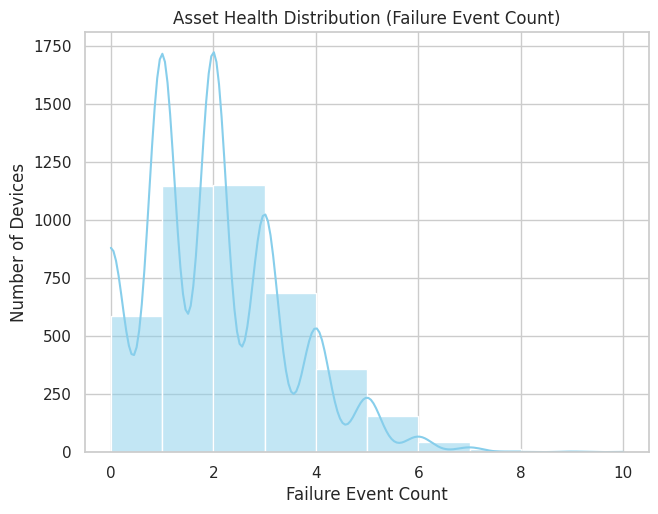

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("/content/Medical_Device_Failure_dataset.csv")

# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(16, 12))

# 1. Asset Health Distribution (Failure Event Count)
plt.subplot(2, 2, 1)
sns.histplot(df['Failure_Event_Count'], bins=10, kde=True, color="skyblue")
plt.title("Asset Health Distribution (Failure Event Count)")
plt.xlabel("Failure Event Count")
plt.ylabel("Number of Devices")

<ipython-input-50-c9a3194b6ceb>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=manufacturer_counts.index, y=manufacturer_counts.values, palette="viridis")


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'ScanPro'),
  Text(1, 0, 'ImagingTech'),
  Text(2, 0, 'MedEquip'),
  Text(3, 0, 'RescueTech'),
  Text(4, 0, 'CardioSync'),
  Text(5, 0, 'UltraMed')])

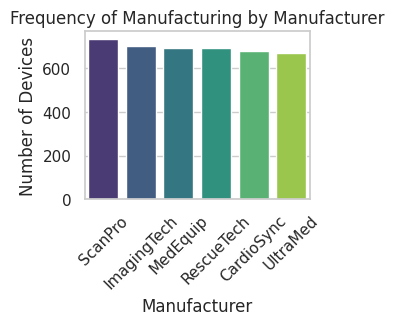

In [50]:
# 2. Frequency of Manufacturing by Manufacturer
plt.subplot(2, 2, 2)
manufacturer_counts = df['Manufacturer'].value_counts()
sns.barplot(x=manufacturer_counts.index, y=manufacturer_counts.values, palette="viridis")
plt.title("Frequency of Manufacturing by Manufacturer")
plt.xlabel("Manufacturer")
plt.ylabel("Number of Devices")
plt.xticks(rotation=45)

<ipython-input-54-08200051196a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_lifecycle.index, y=avg_lifecycle.values, palette="cubehelix")


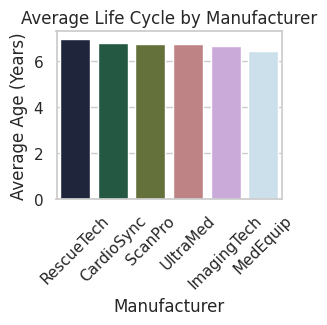

In [54]:
# 3. Average Life Cycle by Manufacturer (Age)
plt.subplot(2, 2, 4)
avg_lifecycle = df.groupby("Manufacturer")["Age"].mean().sort_values(ascending=False)
sns.barplot(x=avg_lifecycle.index, y=avg_lifecycle.values, palette="cubehelix")
plt.title("Average Life Cycle by Manufacturer")
plt.xlabel("Manufacturer")
plt.ylabel("Average Age (Years)")
plt.xticks(rotation=45)
plt.show()

<ipython-input-58-419462f912a5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Device_Type", y="Failure_Event_Count", palette="cool")


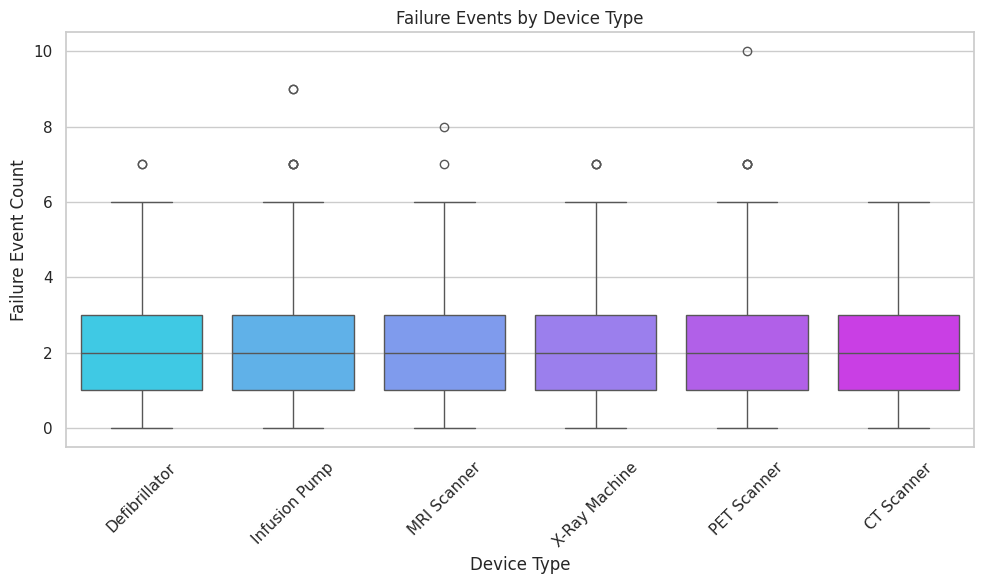

In [58]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Device_Type", y="Failure_Event_Count", palette="cool")
plt.title("Failure Events by Device Type")
plt.xlabel("Device Type")
plt.ylabel("Failure Event Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


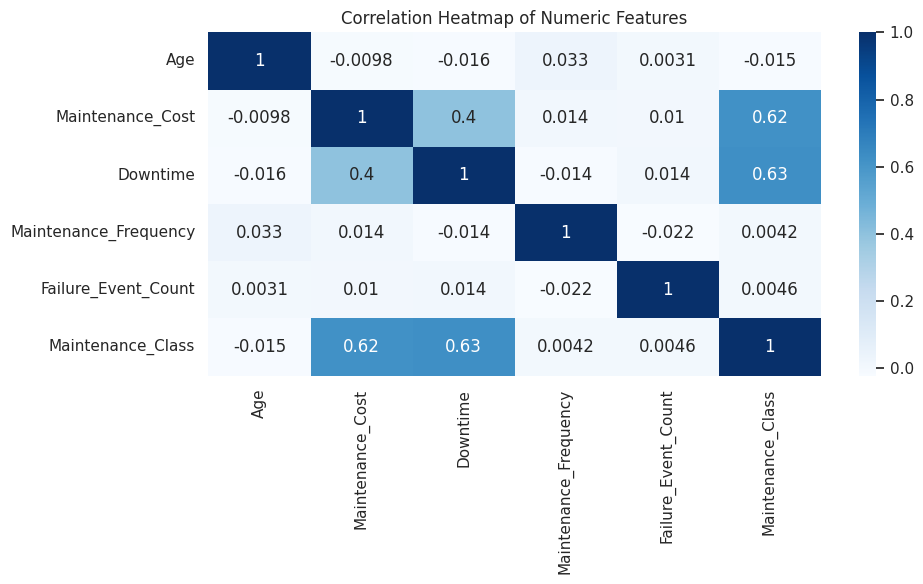

In [59]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='Blues')
plt.title("Correlation Heatmap of Numeric Features")
plt.tight_layout()
plt.show()

# **Feature Selection**

# **1.Improved Differential Evolution with Sailfish Optimizer (DESFO)**

In [61]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load dataset
data = pd.read_csv("/content/target_encoded_dataset.csv")
X = data.drop(columns=["Maintenance_Report"])
y = data["Maintenance_Report"]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameters
pop_size = 10   # Population size
num_features = X_train.shape[1]
max_generations = 10
F = 0.6   # Mutation factor
CR = 0.8  # Crossover probability
A = 2     # SFO exploration parameter (decreases over time)

# Initialize binary population (each individual is a binary feature selector)
population = np.random.randint(0, 2, size=(pop_size, num_features))

# Fitness function
def evaluate_fitness(solution):
    selected_features = np.where(solution == 1)[0]
    if len(selected_features) == 0:
        return 0, []  # Avoid empty feature sets

    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train.iloc[:, selected_features], y_train)
    y_pred = clf.predict(X_test.iloc[:, selected_features])
    return accuracy_score(y_test, y_pred), selected_features

# IDESFO Optimization
def optimize():
    global population
    best_solution = population[0]
    best_accuracy, best_features = evaluate_fitness(best_solution)

    for generation in range(1, max_generations + 1):
        new_population = []
        A_t = A * (1 - generation / max_generations)  # Decreasing exploration factor

        # Identify best (leader) sailfish
        fitness_scores = [evaluate_fitness(ind)[0] for ind in population]
        leader_idx = np.argmax(fitness_scores)
        leader = population[leader_idx]
        leader_accuracy = fitness_scores[leader_idx]

        for i in range(pop_size):
            # Sailfish Prey Movement (SFO-inspired update)
            rand_factor = np.random.uniform(0, 1, num_features)
            prey_movement = A_t * rand_factor * (leader - population[i])
            sailfish_position = population[i] + prey_movement
            sailfish_position = np.clip(sailfish_position, 0, 1)  # Keep within bounds
            sailfish_position = np.round(sailfish_position).astype(int)  # Ensure binary values

            # Differential Evolution Mutation
            idxs = [idx for idx in range(pop_size) if idx != i]
            a, b, c = population[np.random.choice(idxs, 3, replace=False)]
            mutant = a + F * (b - c)
            mutant = np.clip(mutant, 0, 1)
            mutant = np.round(mutant).astype(int)

            # Crossover
            trial = np.where(np.random.rand(num_features) < CR, mutant, sailfish_position)

            # Selection (keep better solution)
            trial_accuracy, trial_features = evaluate_fitness(trial)
            current_accuracy, _ = evaluate_fitness(population[i])

            if trial_accuracy > current_accuracy:
                new_population.append(trial)
            else:
                new_population.append(population[i])

            # Update best solution
            if trial_accuracy > best_accuracy:
                best_solution = trial
                best_accuracy = trial_accuracy
                best_features = trial_features

        population = np.array(new_population)
        print(f"Generation {generation}: Best Accuracy = {best_accuracy}")

    # Print final selected features
    selected_feature_names = X_train.columns[list(best_features)]
    print(f"Final Selected Features: {selected_feature_names}")

    # Save new dataset with selected features
    new_dataset = data[selected_feature_names.to_list() + ["efs"]]
    new_dataset.to_csv("DESFO_1.csv", index=False)
    print("Feature selection completed. Results saved to 'DESFO_1.csv'.")

optimize()

ValueError: could not convert string to float: '2020-12-11'